In [1]:
### load libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import sys
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import scipy.interpolate
from scipy.interpolate import interp1d


In [4]:
### Read file and data variable

In [5]:
fn_temp = '2019-05-23T12_00_00_Daily_temp_2019_AdriaticSea_Z10_CF.nc' # THETAO all 12 months and depths

nut_nc = [os.path.join(fn_temp) for f in fn_temp]
nut_ds = [ xr.open_dataset(nc) for nc in nut_nc]

j = 0
nut_ds[j]

<xarray.Dataset>
Dimensions:  (depth: 10, lat: 216, lon: 241, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 2019-05-23T12:00:00
  * depth    (depth) int64 5 10 20 40 100 200 300 400 500 1000
  * lat      (lat) float32 37.02 37.06 37.1 37.15 ... 45.85 45.9 45.94 45.98
  * lon      (lon) float32 12.0 12.04 12.08 12.12 ... 21.88 21.92 21.96 22.0
Data variables:
    thetao   (time, depth, lat, lon) float64 ...
Attributes:
    Conventions:                     CF-1.8
    bulletin_type:                   forecast
    source:                          MFS EAS6
    institution:                     Centro Euro-Mediterraneo sui Cambiamenti...
    FROM_ORIGINAL_FILE__field_type:  daily_mean_centered_at_time_field
    contact:                         servicedesk.cmems@mercator-ocean.eu
    title:                           Potential Temperature (3D) - Daily Mean
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    comment:                         Please check in CMEMS catalogue the INFO...
    references:                      Clementi, E., Aydogdu, A., Goglio, A. C....
    history:                         Data extracted from dataset http://local...
    bulletin_date:                   20210606

In [6]:
# As you can see the data contains 1 day information 

In [7]:
# Define dataset xarray size for latitude and longitude

In [8]:
tx = nut_ds[j].isel(time=0).sel(lat=slice(37, 46), lon=slice(12, 22))
tx

<xarray.Dataset>
Dimensions:  (depth: 10, lat: 216, lon: 241)
Coordinates:
    time     datetime64[ns] 2019-05-23T12:00:00
  * depth    (depth) int64 5 10 20 40 100 200 300 400 500 1000
  * lat      (lat) float32 37.02 37.06 37.1 37.15 ... 45.85 45.9 45.94 45.98
  * lon      (lon) float32 12.0 12.04 12.08 12.12 ... 21.88 21.92 21.96 22.0
Data variables:
    thetao   (depth, lat, lon) float64 ...
Attributes:
    Conventions:                     CF-1.8
    bulletin_type:                   forecast
    source:                          MFS EAS6
    institution:                     Centro Euro-Mediterraneo sui Cambiamenti...
    FROM_ORIGINAL_FILE__field_type:  daily_mean_centered_at_time_field
    contact:                         servicedesk.cmems@mercator-ocean.eu
    title:                           Potential Temperature (3D) - Daily Mean
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    comment:                         Please check in CMEMS catalogue the INFO...
    references:                      Clementi, E., Aydogdu, A., Goglio, A. C....
    history:                         Data extracted from dataset http://local...
    bulletin_date:                   20210606

In [9]:
# Variable description 

In [10]:
tx.thetao

<xarray.DataArray 'thetao' (depth: 10, lat: 216, lon: 241)>
[520560 values with dtype=float64]
Coordinates:
    time     datetime64[ns] 2019-05-23T12:00:00
  * depth    (depth) int64 5 10 20 40 100 200 300 400 500 1000
  * lat      (lat) float32 37.02 37.06 37.1 37.15 ... 45.85 45.9 45.94 45.98
  * lon      (lon) float32 12.0 12.04 12.08 12.12 ... 21.88 21.92 21.96 22.0
Attributes:
    units:          degrees_C
    standard_name:  sea_water_potential_temperature
    long_name:      potential temperature
    _ChunkSizes:    [  1  29  76 258]

In [11]:
lon_name   = 'lon'
lat_name   = 'lat'

time_name  = 'time'
depth_name = 'depth'

temp       = 'thetao'

time_sel = '2019-05-23T12:00:00'

##Define the location
## for 1 point Longitude and 1 point Latitude

point_X=17.4435
point_Y=41.951909

## fix the points

lat_sel, lon_sel = point_Y, point_X 


In [12]:
##Fix the size of the variable for the selected point

temp_mean_sel = tx.sel(lat=lat_sel, lon=lon_sel, method="nearest")

## x1 defined for the x- axess to see how the Temperature changes with the depth in the ocean

x1=temp_mean_sel.thetao

## z1 defined in minus to see the changes the ocean profondity

z1=-temp_mean_sel.thetao.depth


In [13]:
# The length of the point has to be the same 

print(len(z1),len(x1))


10 10


In [14]:
## WELL DONE, you can see how the temperature changes with vertical levels

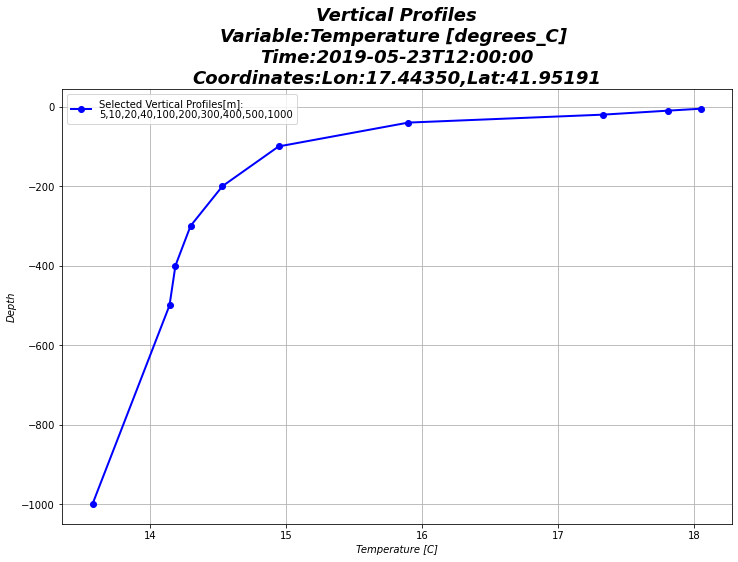

In [15]:
width_inch = 12
height_inch = 8
fig = plt.subplots(figsize=(width_inch, height_inch))

## font style--as you wish-- also can be default

title_fontstyle = {
    "fontsize": "18",
    "fontstyle": "italic",
    "fontweight": "bold",
}

title_fontstyle1 = {
    "fontsize": "10",
    "fontstyle": "italic",
}

## title with automatic selection for units, time and coordinates

title = "Vertical Profiles\nVariable:Temperature [{:s}] \nTime:{:}\nCoordinates:Lon:{:.5f},Lat:{:.5f}".format(temp_mean_sel.thetao.units,time_sel,lon_sel,lat_sel)

plt.title(title, **title_fontstyle)

plt.grid()
plt.plot(x1, z1,  'ob-',linewidth=2)

plt.xlabel("Temperature [C]",**title_fontstyle1)
plt.ylabel("Depth",**title_fontstyle1)
plt.legend(['Selected Vertical Profiles[m]:\n5,10,20,40,100,200,300,400,500,1000'], loc='best')
#plt.savefig('temperature_by_depth.png')
plt.show()

plt.close()
